# Анализ временных рядов с использованием библиотеки Prophet

In [1]:
import numpy as np
import pandas as pd
import copy
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
%%capture
!pip install fbprophet

In [3]:
from fbprophet import Prophet

In [4]:
parser = lambda dt: datetime.strptime(dt, '%Y-%m-%d')

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/AAPL_01_2013_12_2017.csv',parse_dates=['Date'], date_parser=parser)
df_test = pd.read_csv('/content/drive/MyDrive/dataset/AAPL_01_2018.csv',parse_dates=['Date'], date_parser=parser)

### Эксперимент 1

In [6]:
df_ts = copy.deepcopy(df_train)[['Date','Open']]

In [7]:
columns_name = ['ds','y']
df_ts.columns = columns_name

In [8]:
df_ts.reset_index(drop=True, inplace=True)

In [9]:
df_ts.tail()

,ds,y
1254,2017-12-22,43.669998
1255,2017-12-26,42.700001
1256,2017-12-27,42.525002
1257,2017-12-28,42.750000
1258,2017-12-29,42.630001


In [10]:
df_ts.shape

(1259, 2)

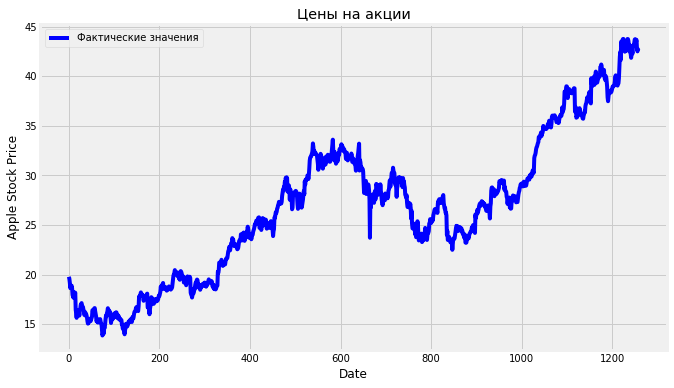

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_ts.y,color='blue', label='Фактические значения')
plt.title('Цены на акции')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [11]:
m = Prophet(daily_seasonality=True, 
            yearly_seasonality=True, 
            weekly_seasonality=True, )
m.fit(df_ts)
future = m.make_future_dataframe(periods=33,freq='D')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [12]:
df_pred = forecast[['ds','yhat']].tail(35)

In [13]:
df_final = df_pred.merge(df_test, left_on='ds',right_on='Date')

In [14]:
df_graph = df_final[['ds','yhat','Open']]

In [15]:
columns_name = ['ds','pred','fact']
df_graph.columns = columns_name

In [16]:
df_graph.head()

,ds,pred,fact
0,2018-01-02,43.265723,42.540001
1,2018-01-03,43.272730,43.132500
2,2018-01-04,43.290712,43.134998
3,2018-01-05,43.281356,43.360001
4,2018-01-08,43.282122,43.587502


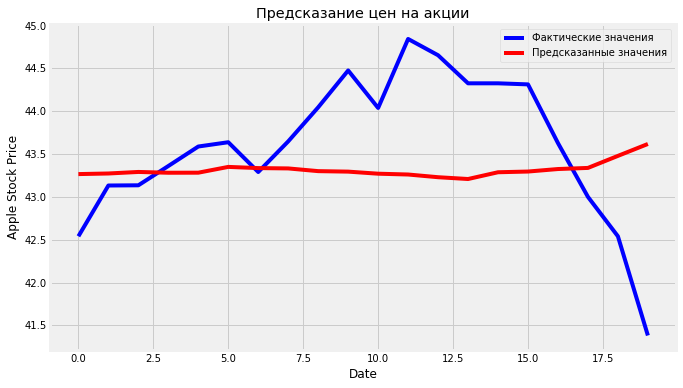

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df_graph.fact,color='blue', label='Фактические значения')
plt.plot(df_graph.pred , color='red', label='Предсказанные значения')
plt.title('Предсказание цен на акции')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

### Эксперимент 2